In [10]:
#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *
# from iaml212cw2_my_helpers import *
from os import getcwd
print(getcwd())
#<----


c:\Users\Jason Hu\Desktop\IAML-CW2\templates


In [12]:
# Q1.1
# X is [A0, A1, ..., A8] Y is 0 or 1
X, Y = load_Q1_dataset("../data/dataset_q1.csv")
# these are np arrays
print('X: ', X. shape, 'Y: ', Y. shape)
Xtrn = X[100:, :]
Ytrn = Y[100:]  # training data set
Xtst = X[0:100, :]
Ytst = Y[0:100]  # test data set


X:  (800, 9) Y:  (800,)


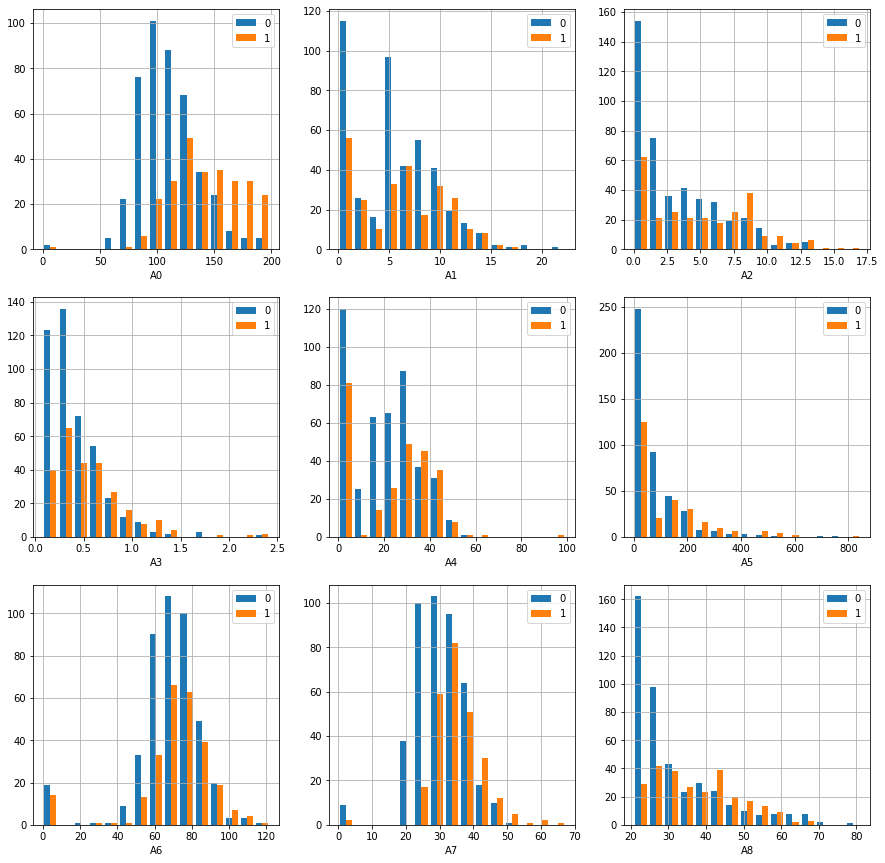

In [41]:
# see how each feature in Xtrn is distributed for each class. Since there
# are nine attributes, we plot a total of nine figures in a 3-by-3 grid, where the top-left figure shows
# the histograms for attribute ’A0’ and the bottom-right ’A8’
# In each figure, you show histograms of instances of class 0 and those of class 1 using pyplot.hist

fig, axs = plt.subplots(3, 3, figsize=(15,15))
mask_Y0, mask_Y1 = Ytrn==0, Ytrn==1  # instances where label is 0 or is 1
instances_0, instances_1 = Xtrn[mask_Y0], Xtrn[mask_Y1]
for row in range(3):
    for column in range(3):
        index = row * 3 + column  # featrue index in Xtrn
        Xa, Xb = instances_0[:, index], instances_1[:, index]
        # print(Xa.shape, Xb.shape)
        ax = axs[row][column]
        ax.hist((Xa, Xb), bins=15)
        ax.set_xlabel("A" + str(index))
        ax.grid()
        ax.legend(['0', '1'])

plt.show()


In [46]:
# Q1.2
# Calculate the correlation coefficient between each attribute of Xtrn and the label Ytrn

# param to_compute: each row a variable, column an observation.
to_compute = Xtrn.T  # shape(9,700)
coeffs = []
for attr in to_compute:
    coeffs.append(np.corrcoef([attr,Ytrn]))
coeffs


[array([[1.       , 0.4911759],
        [0.4911759, 1.       ]]),
 array([[1.       , 0.0874059],
        [0.0874059, 1.       ]]),
 array([[1.        , 0.22728719],
        [0.22728719, 1.        ]]),
 array([[1.        , 0.20736605],
        [0.20736605, 1.        ]]),
 array([[1.        , 0.10772035],
        [0.10772035, 1.        ]]),
 array([[1.       , 0.1856714],
        [0.1856714, 1.       ]]),
 array([[1.        , 0.07626074],
        [0.07626074, 1.        ]]),
 array([[1.        , 0.30445377],
        [0.30445377, 1.        ]]),
 array([[1.        , 0.24034733],
        [0.24034733, 1.        ]])]

In [57]:
# Q1.4 (a)
# Calculate the unbiased sample variance of each attribute of Xtrn, and sort the variances in decreasing order

# use tuple of (attr_name, variance), will need attr's name when plotting
variances = []
for i in range(Xtrn.T.shape[0]):
    attr = Xtrn.T[i]
    variances.append(('A'+str(i), np.var(attr, ddof=1)))  # unbiased
variances = sorted(variances, reverse=True, key=lambda v: v[1])
print(variances)
print('sum of variances:', sum(map(lambda v: v[1], variances)))

[('A5', 14769.0983163317), ('A0', 1006.4338305628447), ('A6', 384.4417023511138), ('A4', 254.1050424860004), ('A8', 139.6276958847333), ('A7', 63.50469851134274), ('A1', 16.72342727243), ('A2', 11.595970953402821), ('A3', 0.10591536868996523)]
sum of variances: 16645.63659972226


In [ ]:
# Q.14(b)
# Plot the following two graphs side-by-side. Use grid lines in each plot.

# 1) amount of variance explained by each of the (sorted) attributes, indicate attribute numbers on the x-axis.
# 2) cumulative variance ratio against the number of attributes, where the range of y-axis should be[0, 1].

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))